In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
plt.rc("font", family="Malgun Gothic")
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset('tips')
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips['count'] = 1
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'count'], dtype='object')

In [5]:
tips.groupby(['sex', 'smoker']).count()

total_bill  tip  day  time  size  count
sex    smoker                                         
Male   Yes             60   60   60    60    60     60
       No              97   97   97    97    97     97
Female Yes             33   33   33    33    33     33
       No              54   54   54    54    54     54

In [6]:
tips.pivot_table('count', 'sex', 'smoker', aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [7]:
sp.stats.binom_test(54, 87, alternative='greater')

0.015709055116923054

In [8]:
sp.stats.binom_test(97, 157, alternative='greater')

0.0019608865580467

In [9]:
tips[(tips['time']=='Dinner') & (tips['sex']=='Female')]['smoker'].value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [10]:
sp.stats.binom_test(29, 52, alternative='greater')

0.24422783468994602

In [11]:
n = 100
tmp = 1

while tmp >= 0.01:
    n = n + 1
    con = 0.7 * n
    mu = 2/3
    tmp = sp.stats.binom_test(con, n, p=mu, alternative='greater')   
print(tmp)
print(n)

0.009906572889331722
1100


In [12]:
n = 1100
con = n*0.7
sp.stats.binom_test(con, n, p=mu, alternative='greater')

0.009906572889331722

In [13]:
# 카이제곱 검정
n = (0,0,0,0,0,5)
sp.stats.chisquare(n)

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

In [14]:
# 카이제곱 독립검정 > 두번쨰가 유의확률 귀무가설 지지(상관관계없다)
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

(0.0992063492063492,
 0.7527841326498471,
 1,
 array([[ 6., 14.],
        [ 9., 21.]]))

In [15]:
obs = np.array([[4,16,20], [23,18,19]])
sp.stats.chi2_contingency(obs)

(9.910060890453046,
 0.00704786570249751,
 2,
 array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

In [16]:
# 단일 z검정 > 실제로 쓰이지 않음
N = 10000
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

# 함수가 없어서 직접만들음
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean()- mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(-1.8433720158265818, 0.06527471300870032)

In [17]:
# 단일 t 검정


In [18]:
x1 = [80,75,85,50,60,75,45,70,90,95,85,80]
x2 = [80,85,70,80,35,55,80]
np.mean(x1), np.mean(x2)

(74.16666666666667, 69.28571428571429)

In [19]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


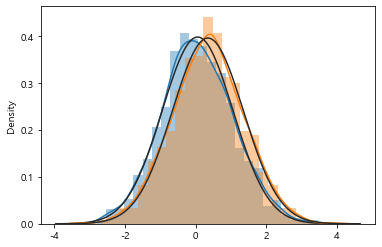

In [20]:
N = 1000
mu_1 = 0
mu_2 = 0.4

x1 = sp.stats.norm(mu_1, 1).rvs(N)
x2 = sp.stats.norm(mu_2, 1).rvs(N)

sns.distplot(x1, fit=sp.stats.norm)
sns.distplot(x2, fit=sp.stats.norm)
plt.show()

In [21]:
sp.stats.ttest_rel(x1,x2)

Ttest_relResult(statistic=-6.520255280969693, pvalue=1.112380743026598e-10)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


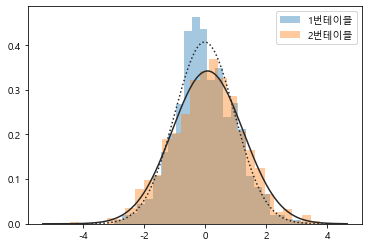

In [26]:
# 등분산테스트

N1 = 1000
N2 = 1000
sigma_1 = 1
sigma_2 = 1.2

x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번테이블')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번테이블')
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [27]:
x1.std(), x2.std()

(0.9799373027266479, 1.1656657639588899)

In [28]:
print(sp.stats.bartlett(x1, x2))
print(sp.stats.fligner(x1, x2))
print(sp.stats.levene(x1, x2))

BartlettResult(statistic=29.92777679375863, pvalue=4.484422828561998e-08)
FlignerResult(statistic=23.379931451824326, pvalue=1.3295843445112186e-06)
LeveneResult(statistic=24.231815378037997, pvalue=9.24137387605042e-07)


C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


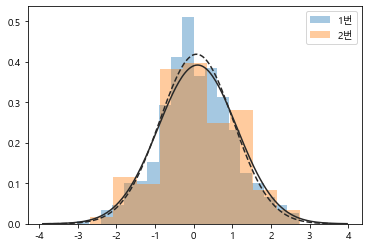

In [42]:
# 정규성 검정 > 귀무가설: 이데이터는정규분포다. > p_value값이 높으면 정규분포
N1 = 500
N2 = 100
x1 = sp.stats.norm(0,1).rvs(N1)
x2 = sp.stats.norm(0,1).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번')
ax.lines[0].set_linestyle("--")
plt.legend()
plt.show()

In [43]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.118, pvalue=0.18630353783178366)

C:\Users\ghdak\AppData\Local\Temp/ipykernel_16040/4266298502.py:3: RuntimeWarning: divide by zero encountered in log2
  return -((a*np.log2(a)) + (b*np.log2(b)))
C:\Users\ghdak\AppData\Local\Temp/ipykernel_16040/4266298502.py:3: RuntimeWarning: invalid value encountered in multiply
  return -((a*np.log2(a)) + (b*np.log2(b)))


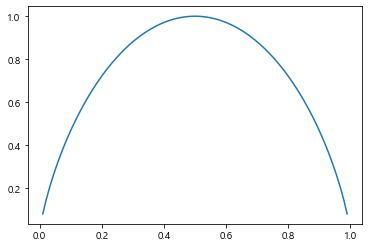

In [47]:
# 베르누이 분포에서 엔트로피 값
def get_entrophy(a, b):
    return -((a*np.log2(a)) + (b*np.log2(b)))
    
xx = np.linspace(0, 1, 100)
yy = 1 - xx
value = get_entrophy(xx, yy)
plt.plot(xx, value)

In [50]:
p = [20/60, 40/60]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [51]:
p = [1/4, 3/4]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [52]:
p = [0, 1]
sp.stats.entropy(p, base=2)

0.0

In [54]:
from collections import deque
a = 'asfsg'


['asfsg']